<h1><center>Laboratorio 6: El Pandas no Muerde (act IV) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Pablo Badilla, Ignacio Meza
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias, Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Sofía Callejas
- Nombre de alumno 2: Iván Meneses 


### **Link de repositorio de GitHub:** `https://github.com/ivanandresmt/lab_6.git`


## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [ ]:
# Libreria Core del lab.
import numpy as np
!pip install --upgrade pandas
!pip install xlrd
!pip install openpyxl
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 69.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 69.1 MB/s eta 0:00:00
  Attempting uninstall:

In [ ]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = "/content/drive/MyDrive/"
except: 
    print('Ignorando conexión drive-colab')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas.

Para esto, el área de ventas les entrega el archivo `online_retail_II.pickle` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

In [ ]:
df_retail = pd.read_pickle(path+"/"+"online_retail_II.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## 1.2 Analisís Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**



Un análisis **univariado** se refiere al análisis de las variable por separado, es decir, se estudia el comportamiento de una sola variable para comprender su comportamiento a través de distintas métricas. 
   Por otro lado, un análisis **multivariado** hace referencia al análisis de 2 o más variables a la vez, por medio de métricas y gráficos de correlación entre estas para entender algún comportamiento relacionado. Con lo que respecta al análisis de datos faltantes, se refiere a conocer la cantidad de datos tipo 'null /NAn' que hay en un dataset, esto es importante para saber a priori la calidad de los datos. Todos estos análisis nos benefician para conocer el comportamiento de los datos en terminos generales.




### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [ ]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe()])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
        count = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns = {'count': 'Count'})
        )
        fig = px.bar(
            x=count[serie.name].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

In [ ]:
profile_serie(df_retail['Invoice'])         

## Invoice Profile

Type                           category
Number of observations           525461
Unique                            28816
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   517456
Duplicate rows (%)              98.48 %
Total size in memory      2338386 bytes
dtype: object

    Análisis de la variable 'Invoice':
     Esta es una variable de tipo categórica y entrega información sobre el número de factura de la transacción, es decir, cumple un rol identificador de las compras. Dado lo anterior, es esperable que esta variable no entregue mayor información ni revele algún comportamiento de las compras, más allá de conocer el top de facturas que contienen mayor cantidad de articulos distintos.







In [ ]:
profile_serie(df_retail['StockCode'])

## StockCode Profile

Type                           category
Number of observations           525461
Unique                             4632
Top                              85123A
Freq                               3516
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525026
Duplicate rows (%)              99.92 %
Total size in memory      1220242 bytes
dtype: object

    Análisis de la variable Stock-Code: Esta variable es de tipo categórica y entrega información sobre el código de producto. Existen en total 4632 productos diferentes en la tienda, de los cuales el más comprado por diferentes clientes es el producto con código '85123A' presente en 3516 facturas.

In [ ]:
profile_serie(df_retail['Description'])

## Description Profile

Type                                                  object
Number of observations                                525461
Unique                                                  4682
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3549
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        525198
Duplicate rows (%)                                   99.95 %
Total size in memory                           4203816 bytes
dtype: object



```
Análisis variable 'Description': Esta variable es de tipo 'object' y almacena la desripción de cada uno de los priductos que ofrece la tienda. Existen en total 4682 descripciones distintas, de las cuales, la que más se repite es 'WHITE HANGING HEART T-LIGHT HOLDER'. Cabe destacar que el tamaño que ocupa esta variable en memotia es de 4203816 bytes, mayor que las variables analizadas anteriormente; esto debido a que el valor guardado es una cadena de texto.

```



In [ ]:
profile_serie(df_retail['Quantity'])

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203816 bytes
dtype: object



```
Análisis de variable 'Quantity': Esta variable es de tipo entero, y entrega información sobre la cantidad de producto ordenado por compra. Se observa que en promedio la cantidad de articulos a comprar en la tienda es 10 por producto, sin embargo, la desviación estandar es de 107, lo que indica que los valores de la variable 'quantity' varian mucho entorno a la media. También cabe señalar que hay una gran presencia de outliers, los que afectan en gran medida el comportamiento de la variable. Quitando los outliers se obtiene una media de 3, lo que reduce en gran proporción la variación de los datos. Finalmente, llama la atención la presencia de valores negativos, los cuales, se presume que hace alusión a productos que se devuelven mediante una devolución de compra.
```



In [ ]:
profile_serie(df_retail['InvoiceDate'])

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           525461
Mean                      2010-06-28 11:37:36.845017856
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 12:20:00
50%                                 2010-07-06 09:51:00
75%                                 2010-10-15 12:45:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   520400
Duplicate rows (%)                              99.04 %
Total size in memory                      4203816 bytes
dtype: object



```
Análisis variable 'InvoiceDate': Esta variable es de tipo fecha y entrega información referente a la fecha en que se realizan las diversas transacciones. Se observa un aumento de las transacciones en el útlimo trimestre del año, que se puede justificar por las compras de navidad y año nuevo.
```



In [ ]:
profile_serie(df_retail['Price'])

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object



```
Análisis Variable 'Price': Esta variable entrega es de tipo flotante (float64) y entrega información del precio de cada uno de los productos que ofrece la tienda. Dada las estadísticas, se tiene que en promedio el costo de un producto transado es de 4.68883 dolares. Sin embargo, esta variable contiene outliers que alteran la media y otras medidas. Es por esto, que quitando los outliers se obtiene un mayor ajuste de la realidad de las transacciones en que los precios se encuentran en un rango de 0 a 120 dolares.
```



In [ ]:
profile_serie(df_retail['Customer ID'])

## Customer ID Profile

Type                           category
Number of observations         417534.0
Unique                           4383.0
Top                             14911.0
Freq                             5710.0
                                       
Missing cells                    107927
Missing cells (%)               20.54 %
Duplicate rows                   525327
Duplicate rows (%)              99.97 %
Total size in memory      1218250 bytes
dtype: object



```
Análsis Variable 'Customer ID': Esta variable es de tipo categórica y es el identificador de cada cliente. Dado esto, se tienen en total 4383 clientes en la base de datos. También es importante señalar que del total de registros (417534), el 20% de ellos son missing values, lo que significa que no se ha podido identificar el 20% del total de transacciones a los clientes respectivos, lo que tiene implicancias directas con el objetivo de segementar a los clientes.
```



In [ ]:
profile_serie(df_retail['Country'])

## Country Profile

Type                              object
Number of observations            525461
Unique                                40
Top                       United Kingdom
Freq                              485852
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    525461
Duplicate rows (%)               100.0 %
Total size in memory       4203816 bytes
dtype: object




```
`Análisis de la variable 'Country': Esta variable es de tipo 'object' y es un string que almacena el país en que se ha realizado la compra. En total hay 40 países distintos en los que se han realizado compras, de los cuales destaca 'United Kingdom' como el país en el que se ha realizado la mayor cantidad de compras (485.852). Con lo que respecta a los valores nulos; no hay presencia de ellos, lo que resulta positivo, ya que, permitirá hacer una segementación de clientes de mayor calidad.`
```



### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes.

In [ ]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df[list_type].corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

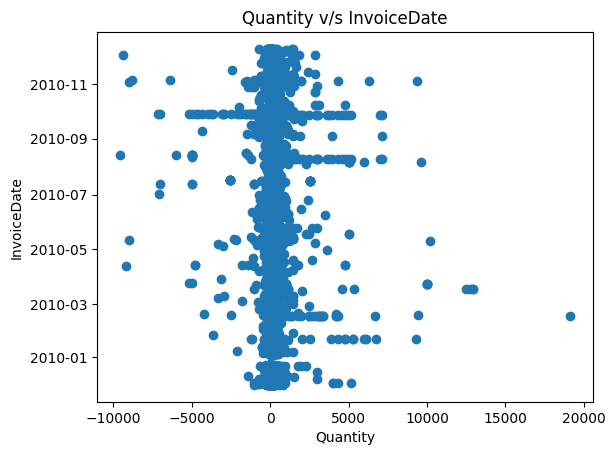

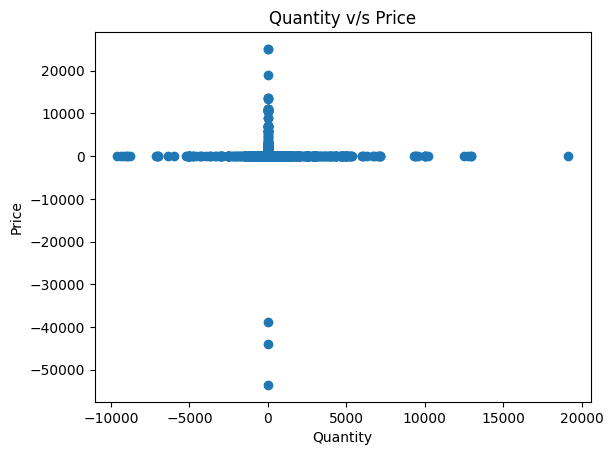

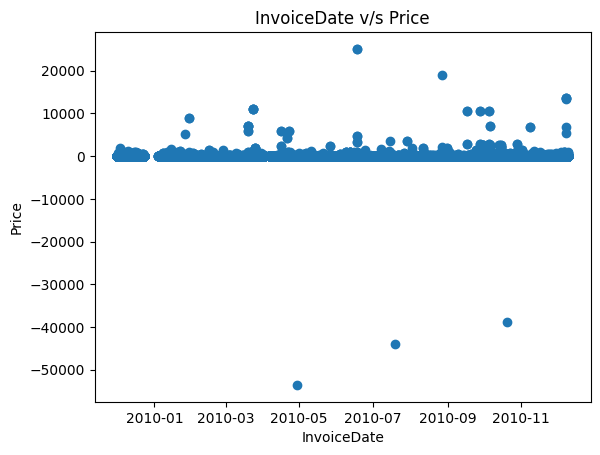

## Correlation:

## Missing Matrix:

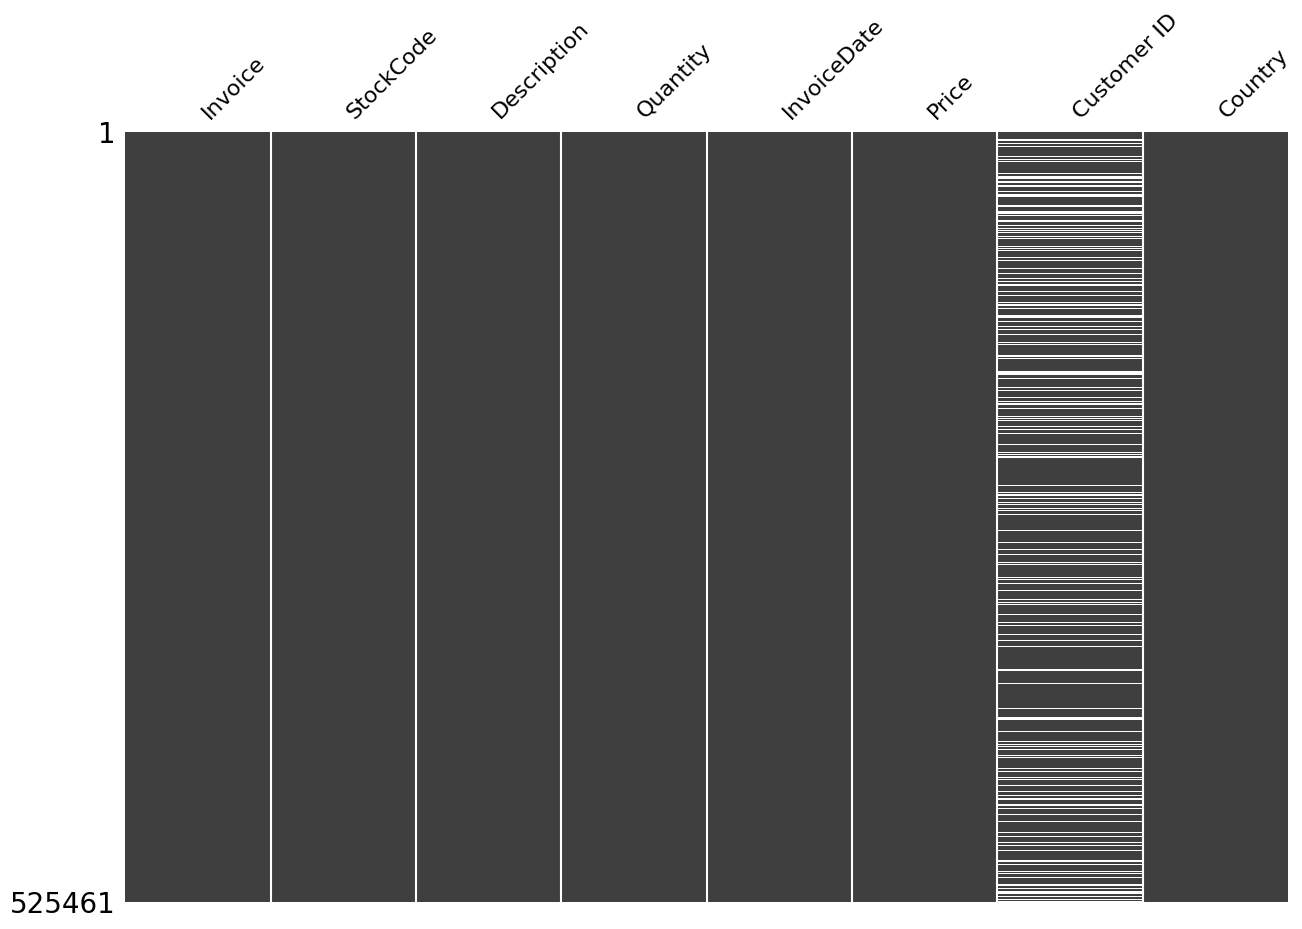

In [ ]:
profile_df(df_retail)

### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que realice una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

In [ ]:
df_retail = df_retail.drop_duplicates()
df_retail = df_retail.dropna()
df_retail = df_retail[df_retail['Price']>0]

## Bivariant Analysis:

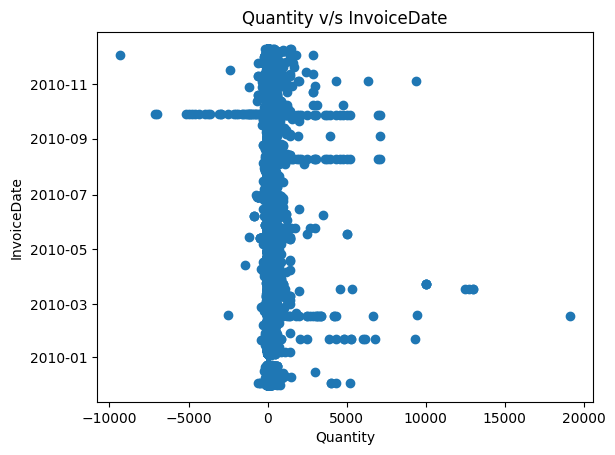

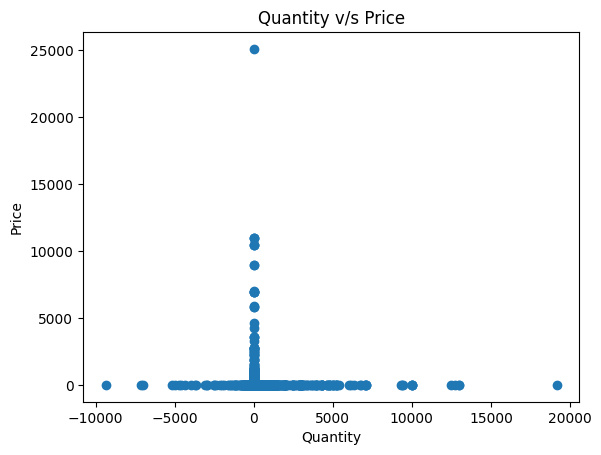

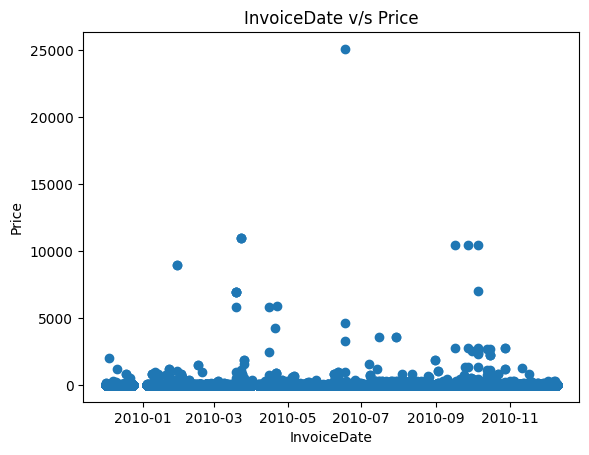

## Correlation:

## Missing Matrix:

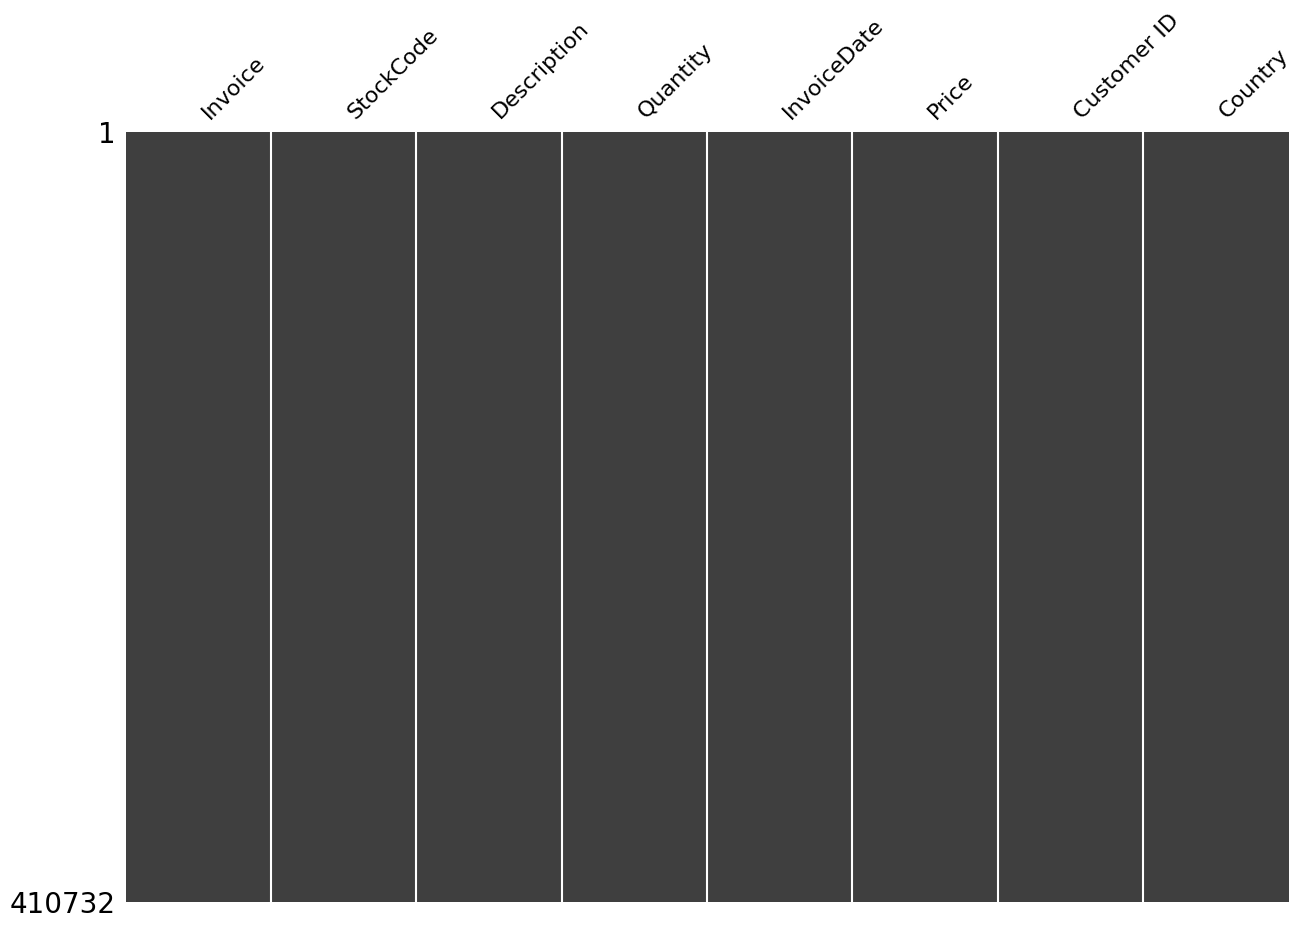

In [ ]:
profile_df(df_retail)

La principal diferencia se puede observar que no hay valores negativos en el precio, ademas se quitaton en el data set los valores nulos reflejandose en el ultimo grafico. Ademas se ve que al quitar los valores duplicados hay menos puntos haciendo menos denso los graficos

### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [ ]:
df_retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Ganancia total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50


In [ ]:
df_retail['Ganancia total'] = df_retail['Quantity']*df_retail['Price']

In [ ]:
descripcion_ganancia = df_retail.groupby(['Description'])['Ganancia total'].sum().reset_index()

In [ ]:
descripcion_ganancia

,Description,Ganancia total
0,DOORMAT UNION JACK GUNS AND ROSES,1071.25
1,3 STRIPEY MICE FELTCRAFT,1237.20
2,4 PURPLE FLOCK DINNER CANDLES,265.20
3,ANIMAL STICKERS,80.85
4,BLACK PIRATE TREASURE CHEST,74.25
...,...,...
4454,ZINC HEART LATTICE TRAY OVAL,352.25
4455,ZINC METAL HEART DECORATION,16389.00
4456,ZINC POLICE BOX LANTERN,783.70
4457,ZINC TOP 2 DOOR WOODEN SHELF,1186.90


In [ ]:
cantidad = df_retail.groupby(['Description'])['Quantity'].sum().reset_index()

In [ ]:
descripcion_ganancia['Cantidad'] = cantidad['Quantity']

In [ ]:
descripcion_ganancia

,Description,Ganancia total,Cantidad
0,DOORMAT UNION JACK GUNS AND ROSES,1071.25,167
1,3 STRIPEY MICE FELTCRAFT,1237.20,660
2,4 PURPLE FLOCK DINNER CANDLES,265.20,200
3,ANIMAL STICKERS,80.85,385
4,BLACK PIRATE TREASURE CHEST,74.25,45
...,...,...,...
4454,ZINC HEART LATTICE TRAY OVAL,352.25,323
4455,ZINC METAL HEART DECORATION,16389.00,13704
4456,ZINC POLICE BOX LANTERN,783.70,193
4457,ZINC TOP 2 DOOR WOODEN SHELF,1186.90,222


In [ ]:
descripcion_ganancia = descripcion_ganancia.sort_values('Ganancia total',ascending=False).head(30)

In [ ]:
descripcion_ganancia

,Description,Ganancia total,Cantidad
4273,WHITE HANGING HEART T-LIGHT HOLDER,148591.51,55760
3260,REGENCY CAKESTAND 3 TIER,136700.55,11873
259,ASSORTED COLOUR BIRD ORNAMENT,69652.16,44000
2073,JUMBO BAG RED RETROSPOT,51493.35,29439
3056,POSTAGE,45520.86,2075
3377,ROTATING SILVER ANGELS T-LIGHT HLDR,39871.50,12216
2672,PAPER CHAIN KIT 50'S CHRISTMAS,36804.50,13816
2686,PARTY BUNTING,34980.10,8304
2077,JUMBO BAG STRAWBERRY,33862.50,19242
1299,EDWARDIAN PARASOL NATURAL,33541.65,7103


In [ ]:
fig = px.histogram(descripcion_ganancia, x="Description", y="Ganancia total")
fig.show()

In [ ]:
fig = px.histogram(descripcion_ganancia, x="Description", y="Cantidad")
fig.show()

Se ve claramente que la cantidad no depende de la mayor ganancia.

### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [ ]:
df_retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Ganancia total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50


In [ ]:
def plot_ventas(dataframe):
  dataframe['new_date_column'] = dataframe['InvoiceDate'].dt.date
  cuenta = dataframe.value_counts('new_date_column').rename_axis('new_date_column').reset_index(name='count')
  fig = px.histogram(cuenta, x="new_date_column", y="count")
  fig.show()




Podemos ver un aumento de ventas en el mes de Noviembre y Diciembre. Sin embargo a principios del año se puede que este disminuye y se vuelve constante.

In [ ]:
plot_ventas(df_retail)

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>